<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    gbvs Mini-Challenge 2 <br> 
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Si Ben Tran im HS 2023.<br>Bachelor of Science FHNW in Data Science.
</p>

In dieser Mini-Challenge werden LE3 und LE4 von gbsv geprüft. In Data Science und Machine Learning werden oft Merkmale (Features) von Bildern und Signalen generiert, um basierend darauf zu analysieren oder zu lernen. Diesem Thema widmen wir uns mittels klassischer Signal- und Bildverarbeitung.

Jede:r Studierende:r hat eine individualisierte Aufgabenstellung. Die Abgabe soll ebenfalls einzigartig sein. 

Die Programmiersprache und die Code-Dokumentation darf frei gewählt werden. Sofern nicht anders erwähnt, dürfen vorhandene Bibliotheken verwendet werden. Gebe die Quellen deiner Daten und ggf. deines Codes an. 

Checkpoints: 

- Aufgabenstellung Rebuttal: In dieser Phase kann die Aufgabenstellung gereviewt und überarbeitet werden. Sofern die Studierenden entsprechende Argumente haben. Bis ca. 1 Woche nach MC-Start am Tag der Sprechstunde. 5. Dez. 2023

- Review ausgewählte Daten: Reviewe deine ausgewählten Daten bis 3 Wochen nach MC-Start mit der Fachexpertin. Das Review kann schriftlich oder in der Sprechstunde erfolgen. 12. Dez. 2023

- Anonymisierte Abgabe im Peer-Grading-Tool: Code, Resultate und Report gemäss Vorlage. Es können aktuell max. 100MB aufs Peer-Grading Tool geladen werden. 12. Jan. 2024 

- Peer-Grading von anderen Abgaben. In letzten Sprechstunde im Semester oder bis 19. Jan 2024. 

Die Termine sind jeweils um 23:59. 



# Setup und Imports

In [1]:
# auto reload for python files
%load_ext autoreload
%autoreload 2

# path for ipynb 
import os 
os.chdir('../')

In [40]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, ccf

# 1 Mustersuche in Bild und Signal (LE3)

## 1.1. Korrelation in Signalen

Suche 1 Signal, welches wiederkehrende Muster enthält. Analyisere dann mittels Auto-Korrelation die wiederkehrenden Muster innerhalb deines Signals. Kann die Periodizität deines Musters via Auto-Korrelogramm sichtbar gemacht werden? Diskutiere deine Methoden- und Parameterwahl sowie die Resultate in ca. 150 Wörtern. 
Schneide nun ein Stück deines Signals aus und versuche es via Kreuzkorrelation im Ursprungssignal zu finden. Woran erkennst du, dass die Stelle passt? Beschreibe in 1-2 Sätzen. Verändere nun dein ausgeschnittenes Stück etwas und schaue, ob es immer noch via Kreuzkorrelation gefunden werden kann. Welche Arten von Veränderungen werden toleriert? Welche nicht? Diskutiere die Resultate in ca. 150 Wörtern. 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht. 


### 1.1.1 Signal mit wiederkehrende Muster

,time,signal
0,0.00000,2.062089
1,0.01001,1.906697
2,0.02002,1.794959
3,0.03003,1.607561
4,0.04004,1.063090
...,...,...
995,9.95996,1.053273
996,9.96997,1.640221
997,9.97998,1.793607
998,9.98999,1.852520


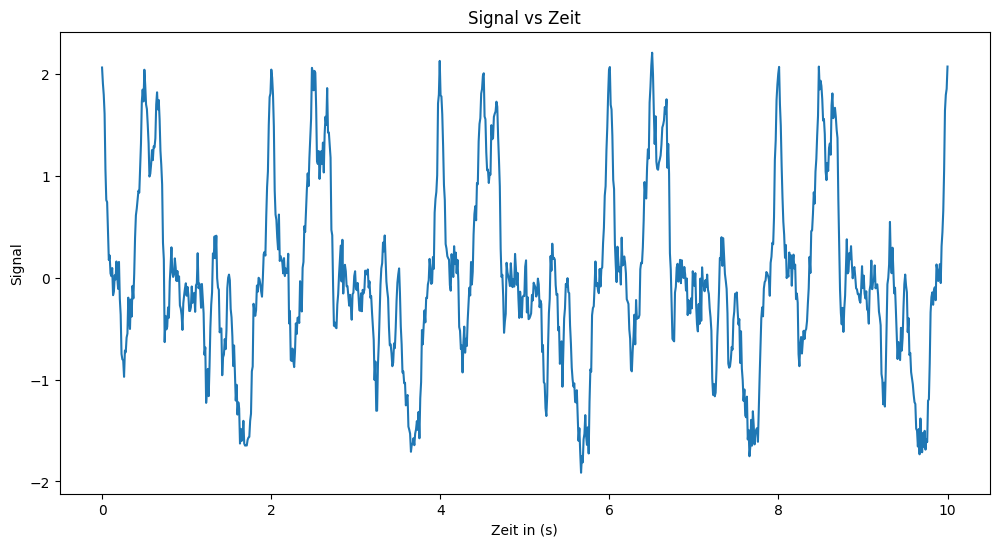

In [3]:
# Define the parameters for the signal
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 10, 1000)
frequency = 1
amplitude = 1
noise_amplitude = 0.25
#
# Create a signal using a combination of sine and cosine functions with some noise
signal = amplitude * np.sin(1 * np.pi * frequency * time) ** 3 + \
         amplitude * np.cos(3 * np.pi * frequency * time) ** 5 + \
         amplitude * np.cos(4 * np.pi * frequency * time) ** 7 + \
         noise_amplitude * np.random.normal(size=len(time), scale=0.5)

# create a dataframe with signal and time
data = pd.DataFrame({'time': time, 'signal': signal})
display(data)

# visualize signal 
fig = plt.figure(figsize=(12, 6))
plt.plot(time, signal)
plt.xlabel('Zeit in (s)')
plt.ylabel('Signal')
plt.title('Signal vs Zeit')
plt.show()


### 1.1.2 Auto-Korrelation des Signals

Dokumentation für die Kreuzkorrelation von Statsmodel: [Link](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html)

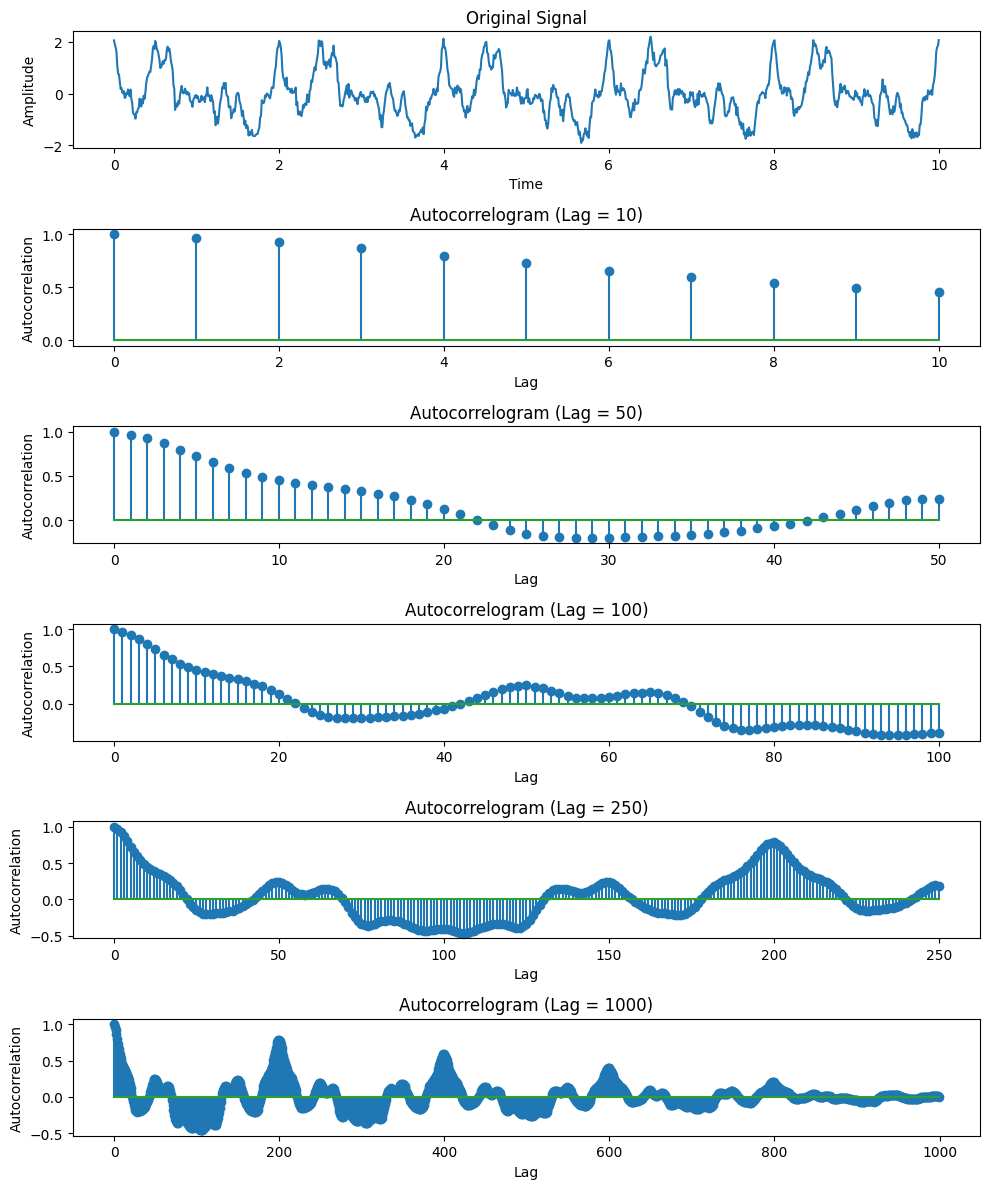

In [4]:
# Lags to plot
lags_to_plot = [0, 10, 50, 100, 250, len(signal)]



# Create subplots for each autocorrelation plot
fig, axes = plt.subplots(len(lags_to_plot), 1, figsize=(10, 12))

for i, lag in enumerate(lags_to_plot):
    # Compute autocorrelation for the current lag
    autocorrelation = acf(signal, nlags=lag)
    
    # Plot the original signal
    if i == 0:
        axes[i].plot(time, signal)
        axes[i].set_title('Original Signal')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Amplitude')
    else:
        # Plot the autocorrelogram for the current lag
        lags = np.arange(len(autocorrelation))
        axes[i].stem(lags, autocorrelation, basefmt = "C2-")
        axes[i].set_title(f'Autocorrelogram (Lag = {lag})')
        axes[i].set_xlabel('Lag')
        axes[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


### 1.1.3 Auschnitt aus dem Signal

,time,signal
102,1.021021,-0.168027
103,1.031031,-0.327068
104,1.041041,-0.326542
105,1.051051,-0.289076
106,1.061061,-0.086617
...,...,...
197,1.971972,1.498527
198,1.981982,1.771660
199,1.991992,1.808079
200,2.002002,2.041621


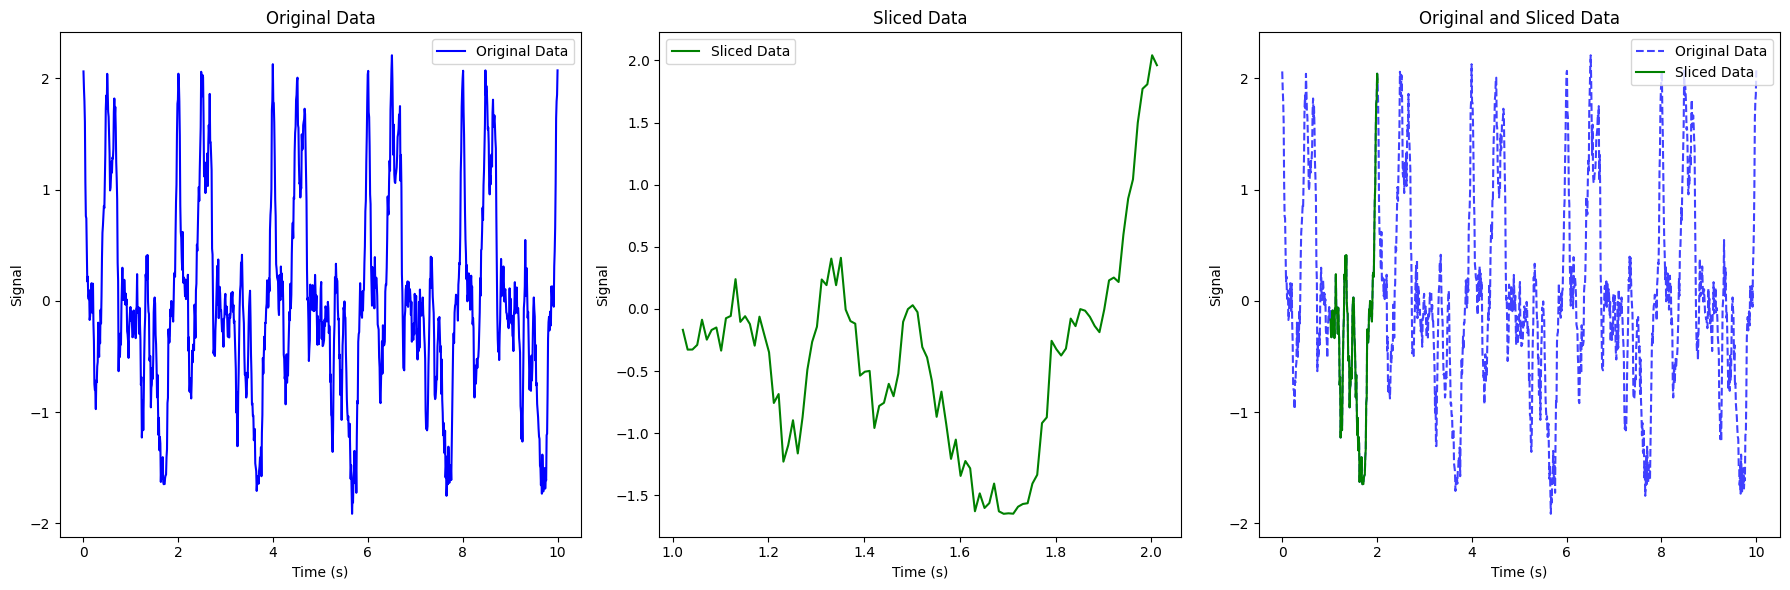

In [67]:
# Function for Slicing a DataFrame
def slice_signal(data, slice_length, random_seed=42):
    # Get the length of the signal data
    signal_length = len(data)

    # set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Generate a random position to start the slice
    start_position = np.random.randint(0, signal_length - slice_length)
    
    # Slice the signal based on the random start position and defined slice length
    sliced_signal = data.iloc[start_position:start_position + slice_length]
    
    return sliced_signal

# Example usage of the slice_signal function with a defined slice length
slice_length = 100  # Define the length of the slice
sliced_data = slice_signal(data, slice_length)
display(sliced_data)

# Create a figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original data in the first subplot
axes[0].plot(data['time'], data['signal'], label='Original Data', color='blue')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Signal')
axes[0].set_title('Original Data')

# Plot the sliced data in the second subplot
axes[1].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Signal')
axes[1].set_title('Sliced Data')

# Plot both original and sliced data in the third subplot
axes[2].plot(data['time'], data['signal'], label='Original Data', color='blue', linestyle='--', alpha=0.75)
axes[2].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Signal')
axes[2].set_title('Original and Sliced Data')

# Add legends to the plots
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

### 1.1.4 Kreuzkorrelation des Auschnitts mit Orginalsignal

Dokumentation für die Kreuzkorrelation von Statsmodel: [Link](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html)

,lags,corr_norm
0,0,0.192529
1,1,0.252220
2,2,0.305505
3,3,0.339486
4,4,0.363175
...,...,...
995,995,0.098394
996,996,0.109149
997,997,0.136355
998,998,0.150328


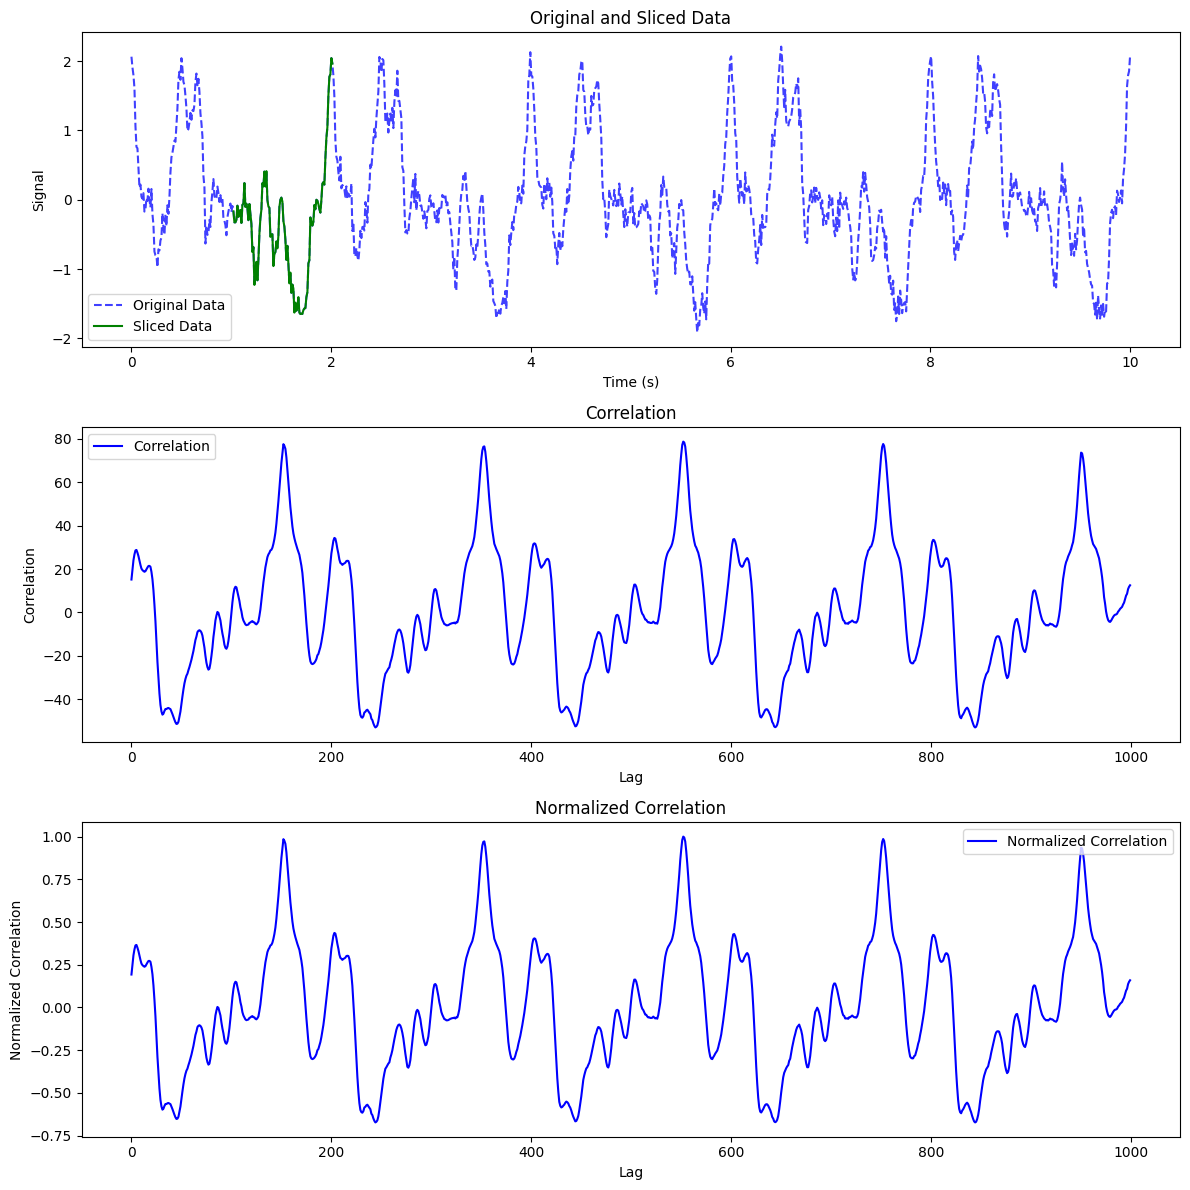

In [82]:
corr = signal.correlate(data['signal'], sliced_data['signal'], mode='same')

# normalize correlation
corr_norm = corr / np.max(corr)

# create a datafarme with corr_norm and reset_index and rename it to lags
corr_norm_df = pd.DataFrame({'lags': corr_norm}).reset_index()
corr_norm_df.columns = ['lags', 'corr_norm']
display(corr_norm_df)

# create one figure with three subplots in a single col
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# plot the original data with the sliced data
axes[0].plot(data['time'], data['signal'], label='Original Data', color='blue', linestyle='--', alpha=0.75)
axes[0].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Signal')
axes[0].set_title('Original and Sliced Data')
axes[0].legend()

# plot the correlation
axes[1].plot(corr, label='Correlation', color='blue')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')
axes[1].set_title('Correlation')
axes[1].legend()

# plot the normalized correlation
axes[2].plot(corr_norm, label='Normalized Correlation', color='blue')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Normalized Correlation')
axes[2].set_title('Normalized Correlation')
axes[2].legend()

plt.tight_layout()
plt.show()



## 1.2 Segmentierung, morphologische Operationen, Objekteigenschaften in Bildern
Suche 1 Bild, welches mehrere ähnliche Objekte enthält. Diese Objekte sollen mittels geeigneter Methoden segmentiert werden. Die Resultate sollen als gelabelte Bilder (binär oder pro Klasse 1 Label) gespeichert werden. Zeige dabei, wie du die Labelmasken mittels morphologischer Operationen verbessert hast. Erkläre hier für jede angewendete Operation in 1-2 Sätzen, warum du diese Operation anwendest. Zeige auch in Einzelbildern die Zwischenresultate deiner angewendeten Operationen und dass du nur minimal die Objekte verändert hast (z.B. keine Verschiebungen, Verkleinerungen oder Vergrösserungen). Extrahiere am Ende deine einzelnen Objekte, zähle und vermesse 2-3 Eigenschaften deiner extrahierten Objekte mittels geeigneten Methoden. Erkläre pro Eigenschaft in 1-2 Sätzen, warum du diese gewählt hast und ob die Resultate brauchbar sind.  

Erstelle dann ein möglichst minimales aber repräsentatives Skeleton eines deiner Objekte und gebe die Anzahl Pixel des Skeletons aus. 

Diskutiere deine Erkenntnisse und Resultate in ca. 150 Wörtern. 
  
Weiterführende Links:
skimage: Label image regions
skimage: Segment human cells (in mitosis)
skimage: Measure region properties


# 2 Feature Deskriptoren in Bildern (LE4)

## 2.1 Keypoint Matching
Suche ein paar Bilder mit dem gleichen Sujet/Objekt aus, welche das Objekt von unterschiedlichen Blickwinkeln, aus anderer Perspektive, aus unterschiedlicher Distanz oder rotiert zeigen. Wende dann den dir zugeordneten Keypoint Deskriptor {'BRISK'} an, um mindestens zwei deiner Bilder via Keypoints zu "matchen". Wähle dafür geeignete Parameter und eine geeignete Anzahl Keypoints. Erläuere deine Entscheidungen in 1-2 Sätzen. Zeige deine Resultate visuell und stelle 2-3 Beobachtungen auf. 
Diskutiere in ca. 150 Wörtern wie robust der dir zugeordnete Algorithms {'BRISK'} ist in Bezug auf Transformationen oder unterschiedlicher Aufnahmeverhältnisse (Licht, ...) und dessen rechnerische Effizienz. Zeige mindestens eine dieser Eigenschaften anhand deiner Beispieldaten. Diskutiere die Resultate und Erkenntnisse in 2-3 Sätzen. 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht.


## 3. Peer-Grading
Nach Abgabe der Mini-Challenge hast du 1 Woche Zeit drei dir zugeordnete Abgaben von anderen zu bewerten. Die Zuordnung erfolgt via FHNW Peer-Grading-Tool (siehe Link unten). Orientiere dich für die Bewertung an den vorgegebenen Bewertungskriterien (siehe Excel-Datei oder Peer-Grading-Tool). Die Note 5 bedeutet, dass alles erfüllt ist, wie du es von einem guten Data Scientist in der Praxis erwarten würdest. Du startest als Baseline mit der Note 5. Entdeckst du Fehler, geht die Note nach unten. Der Note 5.5 nähert man sich, wenn die Erwartungen übertroffen wurden. Der Note 6 nähert man sich, wenn die Leistung ausserordentlich ist und kritisches Denken, Variabilität, eigene Ideen und Kreativität beinhaltet. Siehe auch Checkliste für Bewertung. Die Benotung soll auf Zehntel gerundet sein. Wer auf Zehntel gerundet mit 0.1 Abweichung die Endnote von der Fachexpertin trifft, kriegt einen Bonus von 0.2 Noten für die eigene Abgabe. In der Sprechstunde vom 16. Januar widmen wir uns dem Peer-Grading. 
Weiterführende Links:
FHNW Peer-Grading-Tool
